## **1. Load library**

In [1]:
import pandas as pd
from pycaret.regression import *

## **2. Load dataset**

In [2]:
raw = pd.read_csv('./models/solubility/delaney_solubility_descriptors.csv')
sol_desc = raw
sol_desc

,LogP,Mol Wt,Num Rotatable Bonds,Aromatic Proportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **3. Model Building**

### **3.1. Model Setup**

In [3]:
model = setup(data = sol_desc, target = 'logS', train_size=0.8, silent=True)

,Description,Value
0,session_id,6399
1,Target,logS
2,Original Data,"(1144, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(915, 4)"


### **3.2. Model comparison**

Training set

In [4]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5106,0.5342,0.7267,0.8752,0.2057,0.5749,0.1780
catboost,CatBoost Regressor,0.5380,0.5502,0.7382,0.8710,0.2074,0.6316,1.1870
rf,Random Forest Regressor,0.5332,0.5706,0.7526,0.8665,0.2147,0.6446,0.1810
gbr,Gradient Boosting Regressor,0.5695,0.5919,0.7671,0.8610,0.2161,0.7141,0.0270
lightgbm,Light Gradient Boosting Machine,0.5510,0.5953,0.7689,0.8600,0.2175,0.6899,0.0230
xgboost,Extreme Gradient Boosting,0.5649,0.6454,0.8002,0.8488,0.2246,0.6044,0.2060
ada,AdaBoost Regressor,0.7074,0.8230,0.9054,0.8082,0.2450,0.9777,0.0340
br,Bayesian Ridge,0.7806,1.0399,1.0180,0.7552,0.2917,0.9843,0.0090
lar,Least Angle Regression,0.7802,1.0399,1.0180,0.7551,0.2920,0.9830,0.0090
ridge,Ridge Regression,0.7802,1.0399,1.0180,0.7551,0.2919,0.9833,0.0080


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6399, verbose=0, warm_start=False)

### **3.3. Model Creation**

In [5]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5080,0.4889,0.6992,0.8651,0.2212,0.3533
1,0.5639,0.5702,0.7551,0.8860,0.2081,1.4680
2,0.5311,0.6713,0.8193,0.8655,0.2416,0.7628
3,0.5939,0.6929,0.8324,0.8247,0.2433,0.9524
4,0.5074,0.4774,0.6910,0.8939,0.2017,0.3353
5,0.4016,0.3803,0.6167,0.9082,0.1591,0.2653
6,0.4511,0.3984,0.6312,0.8825,0.1743,0.4475
7,0.5800,0.6423,0.8014,0.8273,0.2410,0.5447
8,0.4434,0.4018,0.6339,0.9125,0.1724,0.2128
9,0.5253,0.6186,0.7865,0.8864,0.1941,0.4069


### **3.4. Model Tuning**

The learning parameters are subjected to optimization at this phase. Here, 50 iterations is used for the optimization process and the fitness function is the Mean Absolute Error (MAE) which is the performance metric used to judge at which learning parameter settings are optimal. 

In [6]:
tuned_et = tune_model(et, n_iter = 50, optimize = 'mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6115,0.6102,0.7811,0.8316,0.2268,0.5249
1,0.6518,0.8082,0.8990,0.8384,0.2492,2.4111
2,0.6425,0.7524,0.8674,0.8492,0.2583,0.8466
3,0.5992,0.6589,0.8117,0.8333,0.2151,1.0683
4,0.5566,0.5596,0.7480,0.8757,0.2148,0.3960
5,0.5245,0.5216,0.7222,0.8741,0.1899,0.3888
6,0.5785,0.6385,0.7990,0.8118,0.2087,0.4810
7,0.5975,0.5562,0.7458,0.8505,0.2172,0.9009
8,0.6093,0.6092,0.7805,0.8673,0.2184,0.3563
9,0.6595,0.9269,0.9628,0.8297,0.2304,0.7276


#### **3.4.1 Model Hyperparameter**

#### Model

In [7]:
plot_model(et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


#### Tuned model

In [8]:
plot_model(tuned_et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mae
max_depth,11
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.001
min_impurity_split,None
min_samples_leaf,6


## **4. Testing**

Apply the trained model (built with 80% subset) to evaluate on the testing set.

In [9]:
prediction_holdout = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5614,0.5188,0.7203,0.8866,0.2106,0.4063


In [10]:
prediction_holdout.head()

,LogP,Mol Wt,Num Rotatable Bonds,Aromatic Proportion,logS,Label
0,4.7181,350.591003,6.0,0.333333,-5.670,-5.66108
1,1.7553,162.279007,5.0,0.000000,-0.830,-1.80563
2,1.6352,78.542000,1.0,0.000000,-1.470,-1.69580
3,2.5724,290.322998,4.0,0.428571,-4.883,-3.65982
4,1.3496,116.160004,3.0,0.000000,-0.820,-1.36000


## **5. Saving Model**

In [23]:
final_model = finalize_model(tuned_et)
save_model(final_model, './models/solubility/solubilityModel.pkl')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='logS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mae', max_depth=11,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min

## **6. Model Analysis**

Further details of the regression plots are available at https://pycaret.org/plot-model/.

**Residuals Plot**

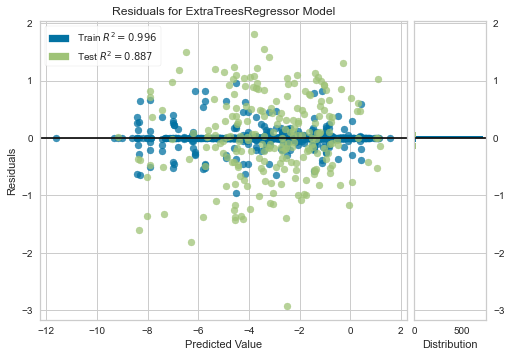

In [12]:
plot_model(et, 'residuals')

**Prediction Error Plot**

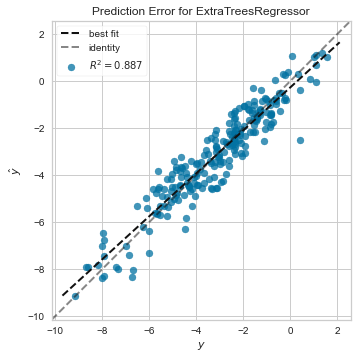

In [13]:
plot_model(et, 'error')

**Cooks Distance Plot**

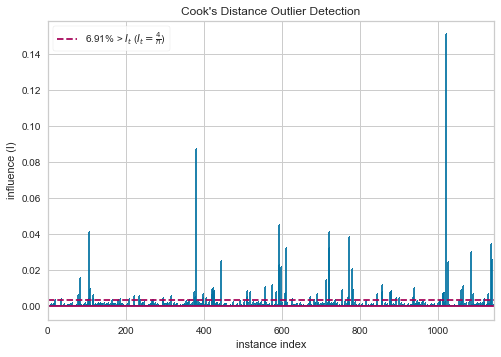

In [14]:
plot_model(et, 'cooks')

**Recursive Feature Selection**

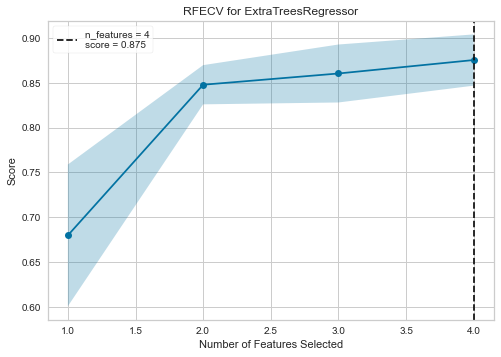

In [15]:
plot_model(et, 'rfe')

**Learning Curve**

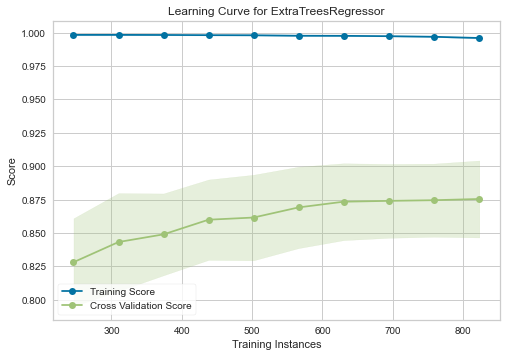

In [16]:
plot_model(et, 'learning')

**Validation Curve**

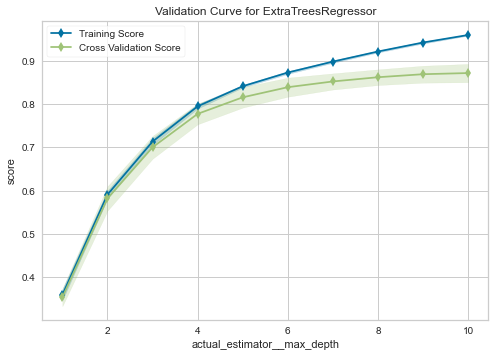

In [17]:
plot_model(et, 'vc')

**Manifold Learning**

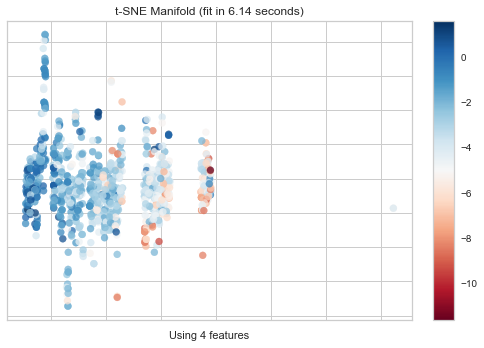

In [18]:
plot_model(et, 'manifold')

**Feature Importance**

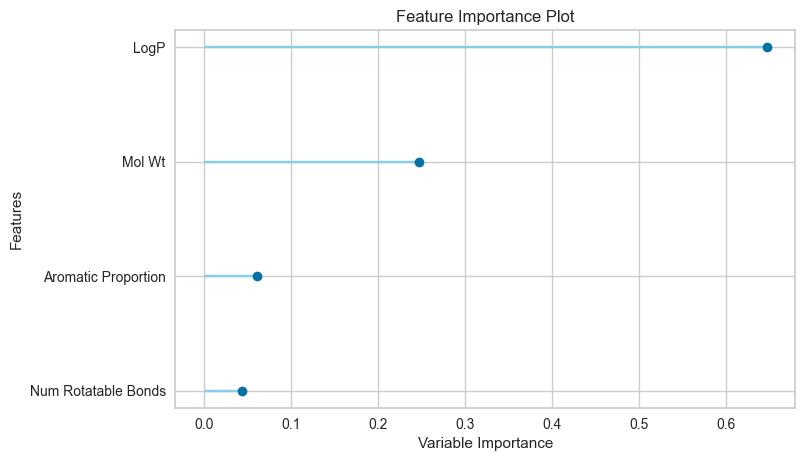

In [19]:
plot_model(et, 'feature')

### **6.2. Model Interpretaion**

The ``interpret_model()`` function of PyCaret leverages the use of the SHAP library to produce stunning plots for depicting the **SHAP (SHapley Additive exPlanations)** values that was originally proposed by Lundberg and Lee in 2016.$^5$ In a nutshell, SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

**Summary Plot**

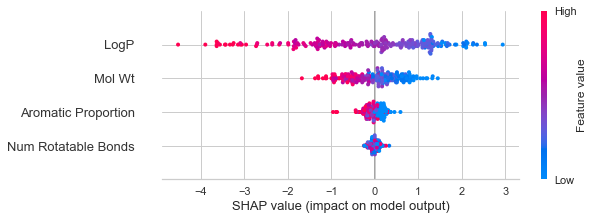

In [20]:
interpret_model(et)

**Correlation Plot**

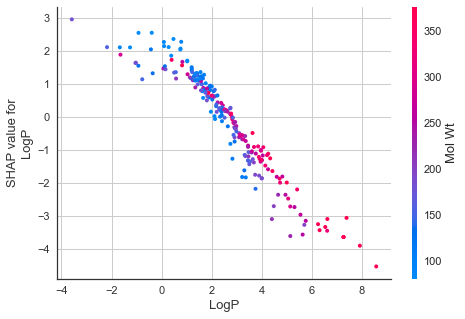

In [21]:
interpret_model(et, plot = 'correlation')

**Reason Plot at Observation Level**

The *Reason Plot at Observation Level* as called by PyCaret is better known as the **force plot** and this plot essentially describes the ***push and pull effect*** that each individual features has on the **base value** that eventually leads to the predicted **output value**.

In [22]:
interpret_model(et, plot = 'reason', observation = 10)